In [1]:
import pandas as pd
pd.options.display.max_columns = None

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.isnull().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

# Data Cleaning

## Remove columns with high proportion of missing values

In [8]:
# Hallo las columnas cuyo porcentaje de valores nulos sean mayores del 40 por ciento y las elimino

In [9]:
data.isna().mean().to_dict()

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 0.1773972602739726,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 0.9376712328767123,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.005479452054794521,
 'MasVnrArea': 0.005479452054794521,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 0.025342465753424658,
 'BsmtCond': 0.025342465753424658,
 'BsmtExposure': 0.026027397260273973,
 'BsmtFinType1': 0.025342465753424658,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 0.026027397260273973,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0006849315068493151,


In [10]:
data = data.drop(data.loc[:, data.isna().mean() > .4], axis=1)

In [11]:
# Comprovamos que esas columnas se han eliminado
data.shape

(1460, 76)

In [12]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Work with the Nan values

In [13]:
# Comprobamos los valores nulos que tenemoa

In [14]:
data.isnull().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'G

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
# Selecciono las columnas de tipo object y sustituimos los nan por la palabra Null
lst_object_columns = list(data.select_dtypes('object'))
data[lst_object_columns] = data[lst_object_columns].fillna('Null')

In [50]:
# Hago lo mismo con las numericas y sustituyo el valor por cero
lst_number_columns = list(data.select_dtypes(np.number))
data[lst_number_columns] = data[lst_number_columns].fillna(0)

## Columns names

In [53]:
# Convierto el nombre de las columnas a minusculas
data.columns = data.columns.str.lower()

## Convert categorical data to numerical

In [58]:
# Creamos una copia seleccionando solo los datos categoricos
obj_df = data.select_dtypes(include=['object']).copy()
obj_df

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [69]:
# Saco las columnas que me interesan para un futuro analisis 
obj_df = obj_df[['street','neighborhood','housestyle','centralair','exterior1st']]

In [73]:
from sklearn.preprocessing import OrdinalEncoder

In [145]:
ord_enc = OrdinalEncoder()
obj_df.loc[:,['code_street','code_neighborhood','code_housestyle','code_centralair','code_exterior1st']] = ord_enc.fit_transform(obj_df[['street','neighborhood','housestyle','centralair','exterior1st']])
obj_df.head(11)

C:\Users\samue\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,street,neighborhood,housestyle,centralair,exterior1st,code_street,code_neighborhood,code_housestyle,code_centralair,code_exterior1st
0,Pave,CollgCr,2Story,Y,VinylSd,1.0,5.0,5.0,1.0,12.0
1,Pave,Veenker,1Story,Y,MetalSd,1.0,24.0,2.0,1.0,8.0
2,Pave,CollgCr,2Story,Y,VinylSd,1.0,5.0,5.0,1.0,12.0
3,Pave,Crawfor,2Story,Y,Wd Sdng,1.0,6.0,5.0,1.0,13.0
4,Pave,NoRidge,2Story,Y,VinylSd,1.0,15.0,5.0,1.0,12.0
5,Pave,Mitchel,1.5Fin,Y,VinylSd,1.0,11.0,0.0,1.0,12.0
6,Pave,Somerst,1Story,Y,VinylSd,1.0,21.0,2.0,1.0,12.0
7,Pave,NWAmes,2Story,Y,HdBoard,1.0,14.0,5.0,1.0,6.0
8,Pave,OldTown,1.5Fin,Y,BrkFace,1.0,17.0,0.0,1.0,3.0
9,Pave,BrkSide,1.5Unf,Y,MetalSd,1.0,3.0,1.0,1.0,8.0


In [83]:
# selecciono las columnas numericas
num_data = data.select_dtypes(np.number)

In [87]:
# Junto los dos subsets en uno nuevo
clean_data = pd.concat([num_data, obj_df], axis=1)

In [88]:
clean_data.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,street,neighborhood,housestyle,centralair,exterior1st,code_street,code_neighborhood,code_housestyle,code_centralair,code_exterior1st
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Pave,CollgCr,2Story,Y,VinylSd,1.0,5.0,5.0,1.0,12.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,Pave,Veenker,1Story,Y,MetalSd,1.0,24.0,2.0,1.0,8.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Pave,CollgCr,2Story,Y,VinylSd,1.0,5.0,5.0,1.0,12.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Pave,Crawfor,2Story,Y,Wd Sdng,1.0,6.0,5.0,1.0,13.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,Pave,NoRidge,2Story,Y,VinylSd,1.0,15.0,5.0,1.0,12.0


# Hypothesis testing

## Two sampled T-test 

- Null hipotesis = los precios de las casas construidas antes de 1950 no hay diferencia significativa de precio con las vendidas despues
- Hipotesis alternativa = si hay una diferencia significativa


In [103]:
# Extraccion del subset con los datos que nos interesas
subset_prices_yr = clean_data[['yearbuilt','saleprice']]
subset_prices_yr = subset_prices_yr.sort_values(by='yearbuilt')

In [104]:
subset_prices_yr.head()

,yearbuilt,saleprice
1349,1872,122000
1137,1875,94000
747,1880,265979
304,1880,295000
1132,1880,117500


### Adjust skewed data distribution

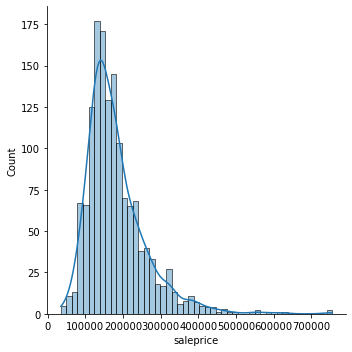

In [109]:
# Vamos a observar la distribucion de el precio de ventas
sns.displot(subset_prices_yr['saleprice'], kde=True, alpha=0.4)
plt.show()

In [111]:
# Podemos observar que existe un sesgo hacia la derecha lo que significa que hay una minoria de casas vendidas a alto precio
# Podemos usar la prueba de shapiro
resp = subset_prices_yr['saleprice']
stats.shapiro(resp)[1]

3.206247534576162e-33

#### Transformación de raíz cuadrada

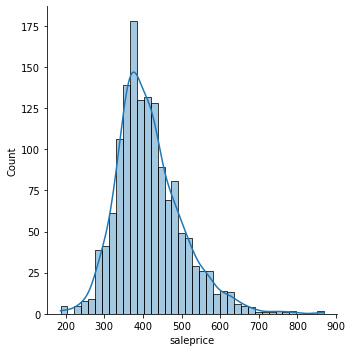

In [113]:
sqrt_resp = resp**(.5)
sns.displot(sqrt_resp, kde=True, alpha=0.4)
plt.show()
# Podemos observar que estan menos sesgados pero todavia tienen una larga cola a la derecha

#### Transformación recíproca

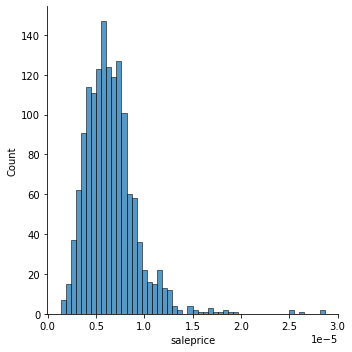

In [115]:
recip = 1/resp
sns.displot(recip)
plt.show()

#### Transformación de registros

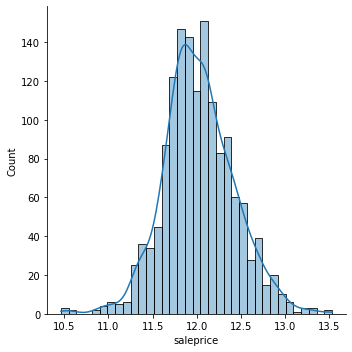

In [118]:
log_resp = np.log(resp)
sns.displot(log_resp, kde=True, alpha=0.4)
plt.show()
# La transformacion logaritmivca parece ser la mejor usaremos esa

In [122]:
subset_prices_yr['log_salesprice'] = np.log(subset_prices_yr['saleprice'])

In [123]:
subset_prices_yr.head()

,yearbuilt,saleprice,log_salesprice
1349,1872,122000,11.711776
1137,1875,94000,11.451050
747,1880,265979,12.491173
304,1880,295000,12.594731
1132,1880,117500,11.674194


In [131]:
before_1950 = subset_prices_yr[subset_prices_yr['yearbuilt'] < 1950]
after_1950 = subset_prices_yr[subset_prices_yr['yearbuilt'] > 1950]

a = 0.05

before_mean = np.mean(before_1950['log_salesprice'])
after_mean = np.mean(after_1950['log_salesprice'])
print("before mean value:",before_mean)
print("after mean value:",after_mean)

before_std = np.std(before_1950['log_salesprice'])
after_std = np.std(after_1950['log_salesprice'])
print("before std value:",before_std)
print("after std value:",after_std)

x = before_1950['log_salesprice']
y = after_1950['log_salesprice']
stat, p_value = stats.ttest_ind(x, y)

print('we reject null hypothesis') if p_value < a else print('we accept null hypothesis')

before mean value: 11.72071412858213
after mean value: 12.115235736057402
before std value: 0.3765547232505754
after std value: 0.3611536524426072
we reject null hypothesis


Rechazamos la hipotesis nula lo que significa que si existe una diferencia signoificativa entre el precio de las viviendas si fueron construidas antes o despues de 1950

## one-sample Z test

In [136]:
clean_data

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,street,neighborhood,housestyle,centralair,exterior1st,code_street,code_neighborhood,code_housestyle,code_centralair,code_exterior1st
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Pave,CollgCr,2Story,Y,VinylSd,1.0,5.0,5.0,1.0,12.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,Pave,Veenker,1Story,Y,MetalSd,1.0,24.0,2.0,1.0,8.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Pave,CollgCr,2Story,Y,VinylSd,1.0,5.0,5.0,1.0,12.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Pave,Crawfor,2Story,Y,Wd Sdng,1.0,6.0,5.0,1.0,13.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,Pave,NoRidge,2Story,Y,VinylSd,1.0,15.0,5.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,Pave,Gilbert,2Story,Y,VinylSd,1.0,8.0,5.0,1.0,12.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,Pave,NWAmes,1Story,Y,Plywood,1.0,14.0,2.0,1.0,9.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,Pave,Crawfor,2Story,Y,CemntBd,1.0,6.0,5.0,1.0,5.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,Pave,NAmes,1Story,Y,MetalSd,1.0,12.0,2.0,1.0,8.0


### z-test

Vamos a comprobar si la media de plazas de garage es de 1 o más para ver si a los constructores les interesa hacer garajes más grandes o pequeños
- Hipotesis nula = la media es de 1
- Hipotesis alternativa la media es mayor de 1

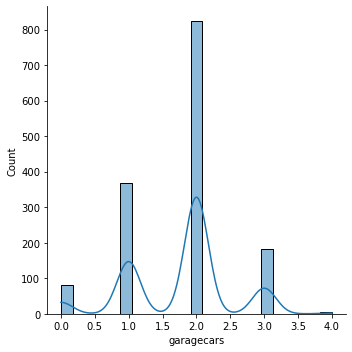

In [138]:
sns.displot(clean_data['garagecars'], kde=True)

In [141]:
from statsmodels.stats import weightstats as stests

stat, p_value = stests.ztest(clean_data['garagecars'], x2=None, value=156)
a = 0.05
print("reject null hypothesis") if p_value < a else print("accept null hypothesis")

reject null hypothesis


Rechazamos la hipotesis nula interesa más hacer garajes de más de una plaza

## Pearson correlation coefficient

- H0: La fecha de construcción más temprana de la casa da lugar a un precio más bajo de la misma
- H1: La fecha de construcción más temprana de la casa no da lugar a un precio más bajo de la misma

In [148]:
# convertimos la columnas en arrays
X = clean_data['yearbuilt']
Y = clean_data['saleprice']
a = 0.05 # El nivel de significancia

# Realizo el pearson test
sta, p_value = stats.pearsonr(X,Y)
print(sta, p_value)

# Comprovacion 
print("reject null hypothesis") if p_value < a else print("accept null hypothesis")

0.5228973328794968 2.9902290990158995e-103
reject null hypothesis


el valor p es muy inferior al nivel de significación de 0,05. Por lo tanto, rechazaremos la hipótesis nula basándonos en el resultado del valor p de la prueba de Pearson, ahora sabemos que el precio de la vivienda y el año de construcción no comparten ninguna correlación fuerte entre sí. 
Podemos verlo mejor con un scatter plot.

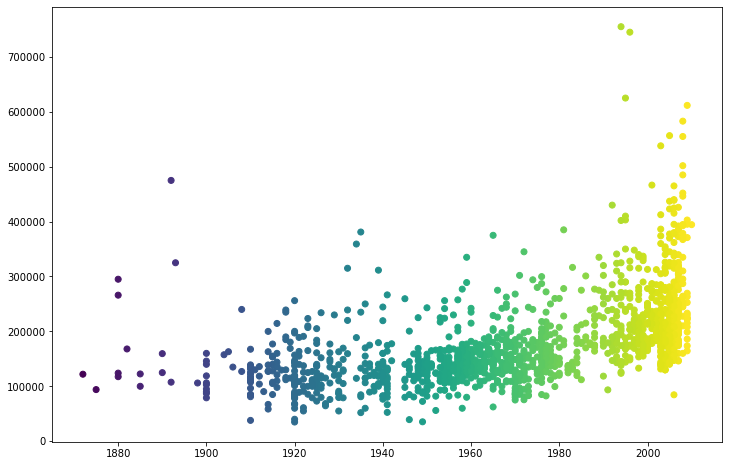

In [171]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.scatter(X, Y, c=clean_data['yearbuilt'], label=clean_data['yearbuilt'])
plt.show()

El precio medio de la vivienda es de 180.921, con un valor medio de 163.000.
Podemos ver el precio de las casas que entran en ese rango mientras que las casas fueron construidas desde 1882 y 2009

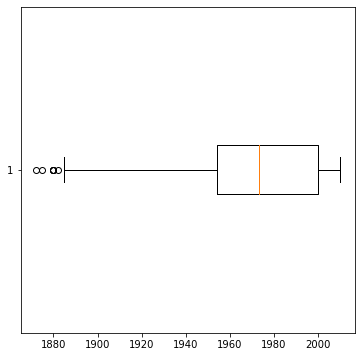

In [170]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.boxplot(clean_data['yearbuilt'], vert=False)
plt.show()

# Machine Learning

In [174]:
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [181]:
# Elimino las columnas tipo object que ya pase a numericas antes 
clean_data = clean_data.drop(clean_data.select_dtypes('object'), axis=1)

In [183]:
clean_data.shape

(1460, 43)

## Analizando la variable de sales price

In [214]:
clean_data['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

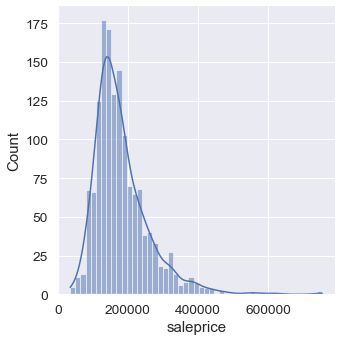

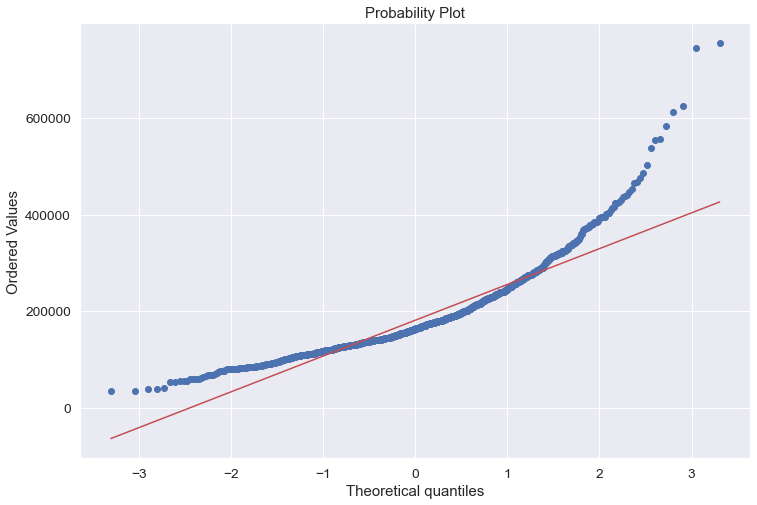

Skewness: 1.882876
Kurtosis: 6.536282


In [215]:
# Visualizacion
sns.displot(clean_data['saleprice'], kde=True);

fig = plt.figure()
res = stats.probplot(clean_data['saleprice'], plot=plt)
plt.show()

print("Skewness: %f" % clean_data['saleprice'].skew())
print("Kurtosis: %f" % clean_data['saleprice'].kurt())

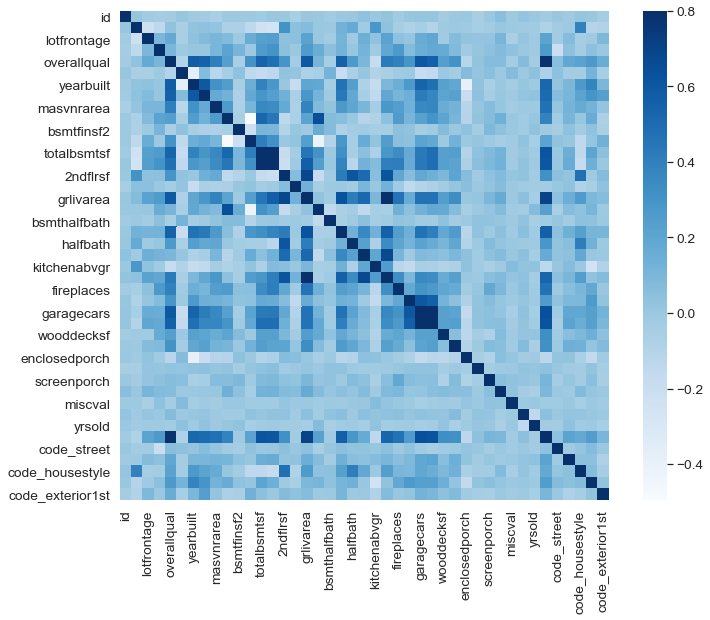

In [216]:
# Matriz de correlacion heatmap
corrmat = clean_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues")
plt.show()

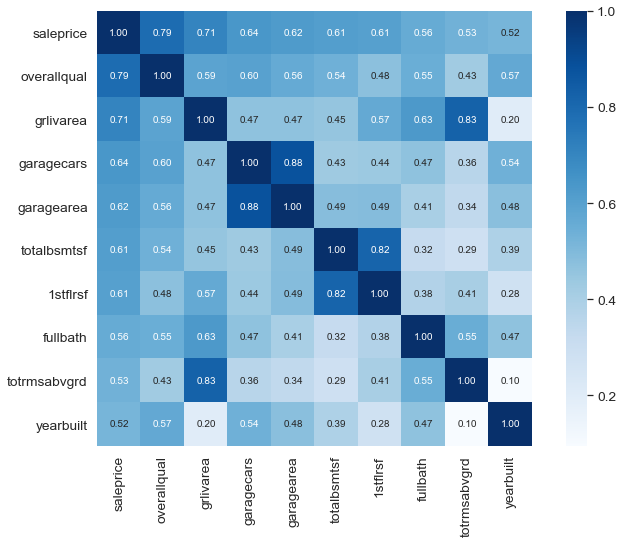

In [217]:
# Lo voy a reducir a los diez valores que realmente más afectan al valor de las casas
k = 10 
cols = corrmat.nlargest(k, 'saleprice')['saleprice'].index
cm = np.corrcoef(clean_data[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="Blues")
plt.show()

## Train_test split

In [225]:
X = clean_data[['saleprice','overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','1stflrsf','fullbath','totrmsabvgrd','yearbuilt']]
# Como la variable de precio de venta se escora a la derecha la normalizamos lo más posible 
resp = clean_data['saleprice']
log_resp = np.log(resp)
y = log_resp

In [226]:
# Creo mis modelos de prueba y de test en proporcion 80% a 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
X_train.head()

,saleprice,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt
254,145000,5,1314,1,294,1314,1314,1,5,1957
1066,178000,6,1571,2,380,799,799,2,7,1993
638,85000,5,796,0,0,796,796,1,4,1910
799,175000,5,1768,1,240,731,981,1,7,1937
380,127000,5,1691,1,308,1026,1026,2,6,1924


In [228]:
#  Regresion lineal
lm = LinearRegression()

In [229]:
lm.fit(X_train, y_train)

LinearRegression()

In [230]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficint'])
coeff_df

,Coefficint
saleprice,0.000004
overallqual,0.026640
grlivarea,0.000038
garagecars,0.041056
garagearea,-0.000005
totalbsmtsf,0.000008
1stflrsf,0.000008
fullbath,0.005225
totrmsabvgrd,0.004864
yearbuilt,0.001170


In [231]:
# creo mi modelo predictivo
predictions = lm.predict(X_test)

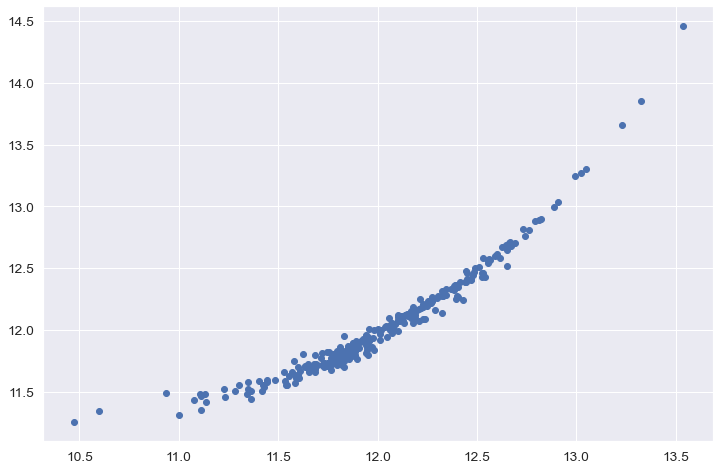

In [233]:
# Visualizacion
plt.scatter(y_test, predictions)
plt.show()

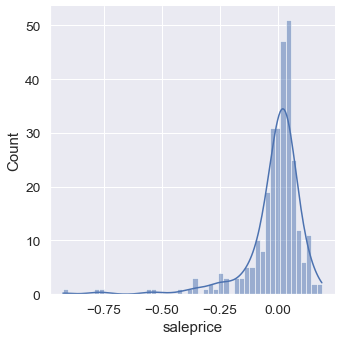

In [235]:
sns.displot(y_test-predictions, bins=50, kde=True);

In [238]:
from sklearn.datasets import load_boston
boston = load_boston()

In [239]:
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [240]:
# Vamos a ver algunas estadisticas del df
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [241]:
# iniciamos el modelo de regresion lineal
reg = LinearRegression()

In [243]:
# Creo el modelo de entrenamiento y de test en 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [246]:
# Entrenamos el modelo con nuestro train data
reg.fit(X_train, y_train)

LinearRegression()

In [247]:
print(reg.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [248]:
# Imprimimos las predicciones de nuestro modelo
y_pred = reg.predict(X_test)
y_pred

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992],
       [23.25442929],
       [17.66253818],
       [14.34119   ],
       [23.01320703],
       [20.63245597],
       [24.90850512],
       [18.63883645],
       [-6.08842184],
       [21.75834668],
       [19.23922576],
       [26.19319733],
       [20.64773313],
       [ 5.79472718],
       [40.50033966],
       [17.61289074],
       [27.24909479],
       [30.06625441],
       [11.34179277],
       [24.16077616],
       [17.86058499],
       [15.83609765],
       [22.78148106],
       [14.57704449],
       [22.43626052],
       [19.19631835],
       [22.43383455],
       [25.21979081],
       [25.93909562],
       [17.70162434],
       [16.76911711],
       [16.95125411],
       [31.23340153],
       [20.13246729],
       [23.76579011],
       [24.6322925 ],
       [13.94204955],
       [32.25576301],
       [42.67251161],
       [17.32745046],
       [27.27618614],
       [16

In [249]:
# Chequeamos el modelo usando Mean Squared Error MSE and sklearn.metrics
np.mean((y_pred-y_test)**2)

0    24.291119
dtype: float64

In [250]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

24.291119474973456